In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,skew

from scipy import stats
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [104]:
train_data=pd.read_csv('./input/train.csv')
test_data=pd.read_csv('./input/test.csv')

## 数据探索

#### 除了测试数据中没有价格这一项特征，其他的特征与训练数据中的特征名称一致。
    
    数据中的id这一项没有作用，这里我们将其删除

In [105]:
print("删除id前的训练数据的 shape：{}".format(train_data.shape))
print("删除id前测试数据的 shape：{}".format(test_data.shape))


#Save the 'Id' column
train_ID = train_data['Id']
test_ID = test_data['Id']

train_data=train_data.drop('Id',axis=1)
test_data=test_data.drop('Id',axis=1)

print('\n')
print("删除id前的训练数据的 shape：{}".format(train_data.shape))
print("删除id前测试数据的 shape：{}".format(test_data.shape))


删除id前的训练数据的 shape：(1460, 81)
删除id前测试数据的 shape：(1459, 80)


删除id前的训练数据的 shape：(1460, 80)
删除id前测试数据的 shape：(1459, 79)


In [106]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# train_data.columns

### 可视化价格分布

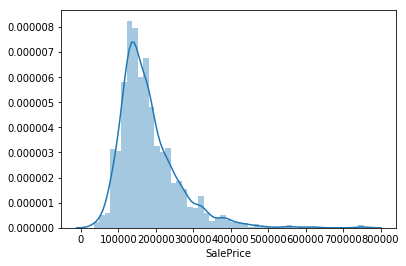

In [107]:
sns.distplot(train_data['SalePrice'])

## 查看数据的偏度和峰度
    
    偏度： 
    （1）Skewness = 0 ，分布形态与正态分布偏度相同。
    （2）Skewness > 0 ，正偏差数值较大，为正偏或右偏。长尾巴拖在右边，数据右端有较多的极端值。
    （3）Skewness < 0 ，负偏差数值较大，为负偏或左偏。长尾巴拖在左边，数据左端有较多的极端值。
    （4）数值的绝对值越大，表明数据分布越不对称，偏斜程度大。
    
    峰度：
    （1）Kurtosis=0 与正态分布的陡缓程度相同。
    （2）Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰
    （3）Kurtosis<0 比正态分布的高峰来得平缓——平顶峰

In [108]:
print("Skewness:%f"% train_data['SalePrice'].skew())
print("Kurtosis:%f"% train_data['SalePrice'].kurt())

Skewness:1.882876
Kurtosis:6.536282


### 我们先来看一下数据中我们觉得影响房价大的因素和房价之间的关系

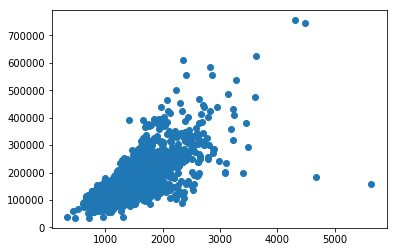

In [109]:
fig,ax=plt.subplots()
ax.scatter(x=train_data['GrLivArea'],y=train_data['SalePrice'])

我们可以判断出最右侧的两个点是异常点，我们将其删除

In [110]:
train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<300000)].index)

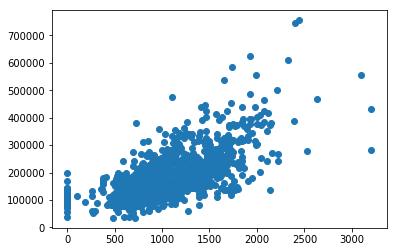

In [111]:
fig,ax=plt.subplots()
ax.scatter(x=train_data['TotalBsmtSF'],y=train_data['SalePrice'])

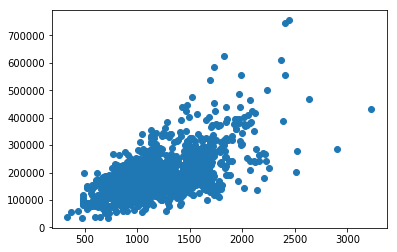

In [112]:
fig,ax=plt.subplots()
ax.scatter(x=train_data['1stFlrSF'],y=train_data['SalePrice'])

### 输出各个特征之间的相关性
    
    线性相关关系主要采用皮尔逊（Pearson）相关系数r来度量连续变量之间线性相关强度；
    r>0,线性正相关；r<0,线性负相关 随着一个特征的增大而减小；
    r=0,两个变量之间不存在线性关系，并不代表两个变量之间不存在任何关系。
    
    0<= |r|<0.3    低程度相关
    0.3<= |r|<0.8   中程度相关
    0.8<= |r|< 1   高程度相关


In [113]:
corrmat = train_data.corr()
corrmat.head()

### 使用热力图查看各个特征之间的关系

In [114]:
fig,ax=plt.subplots(figsize=(20,16))
sns.heatmap(corrmat,annot=True,fmt ='.1')
plt.show()

### 现在我们查看与SalePrice关系最密切的前十个特征
    
    通过 pd.nlargest(num，'特征')可以帮我们找到该特征系数最高的样本
    
    在np中可以通过 np.corrcoef 可以计算矩阵相关系数，在pd中可以通过corr()方法来实现
    
    以下两种可视化结果都可以进行一个矩阵相关系数的展示

In [115]:
top_ten=10
columns=corrmat.nlargest(top_ten,'SalePrice')['SalePrice'].index

In [116]:
# 使用np.corrcoef 计算矩阵相关系数，然后画图
# cm=np.corrcoef(train_data[columns].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
# plt.show()

In [117]:
corrmat_ten=train_data[columns].corr()
fig,ax=plt.subplots(figsize=(15,12))
sns.heatmap(corrmat_ten,annot=True,fmt ='.2')
plt.show()

### 通过热力图我们知道了各个特征之间的相关系数，接下来我们使用散点图查看多个成对双变量的分布图
    
    在上面的热力图中我们可以观察到特征之间的相关系数，我们通过这些相关我们可以观察到 GrLivArea 和 GarageCars 之间的相关系数很高，我们可以选择分析其中的一个变量即可，看起来 GarageCars 和 SalePrice 之间的相关系数更高，所以我们保留 GarageCars，同理我们可以看出 GrLivArea 和 TotRmsAbvGrd 、 GrLivArea 和 TotRmsAbvGrd 之间的相关系数也很高，所以我们保留相关系数高的。

D:\python\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


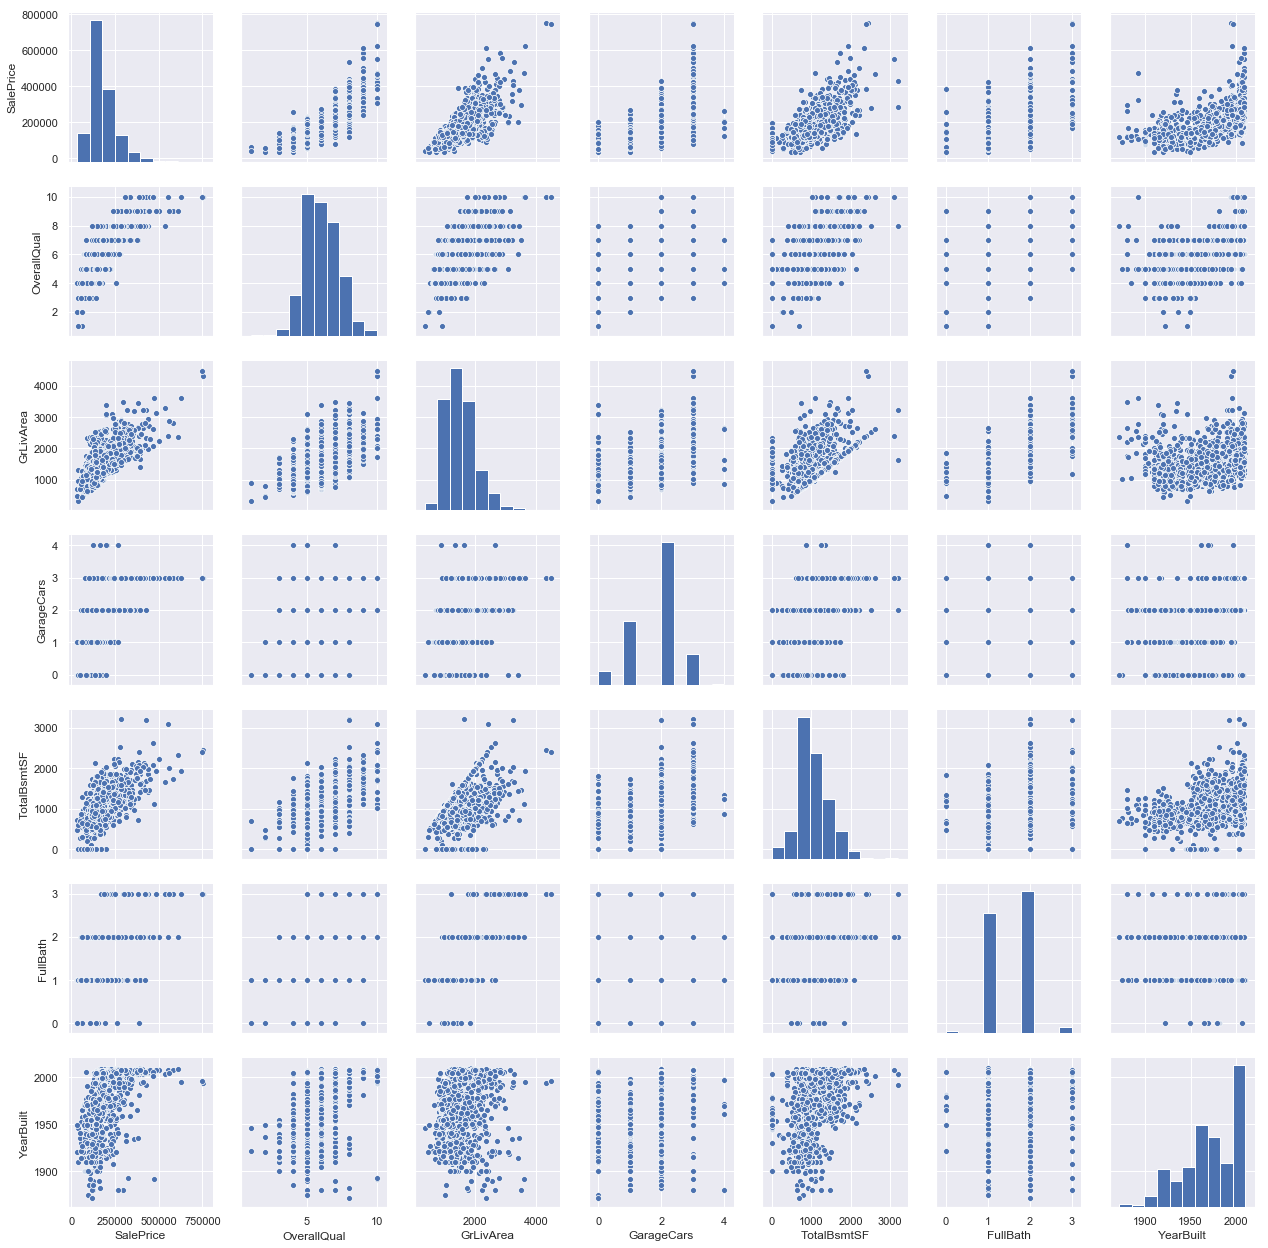

In [118]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols],size=2.5)
plt.show()

### 我们可以看出来我们的特征和价格之间的关系是线性的 (自变量与因变量之间有线性关系。)
#### 由于（线性）模型喜欢正态分布的数据，我们需要转换此变量并使其更正常分布。


 mu = 180932.92 and sigma = 79467.79



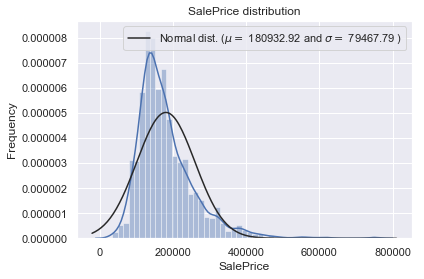

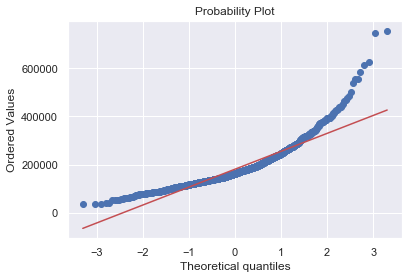

In [119]:
# Get the fitted parameters used by the function
sns.distplot(train_data['SalePrice'],fit=norm)
(mu, sigma) = norm.fit(train_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

#### 对数化可以使得数据趋向正太分布


 mu = 12.02 and sigma = 0.40



Text(0.5, 1.0, 'SalePrice distribution')

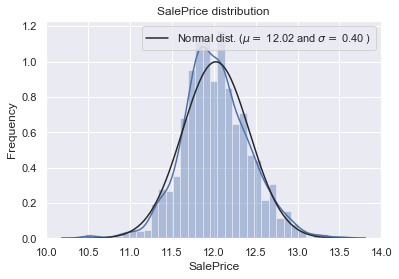

In [120]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])

#Check the new distribution 
sns.distplot(train_data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


 mu = 12.02 and sigma = 0.40



#### 画QQ图
    它主要是直观的表示观测与预测值之间的差异。一般我们所取得数量性状数据都为正态分布数据。预测的线是一条从原点出发的45度角的虚线，事假观测值是实心点。

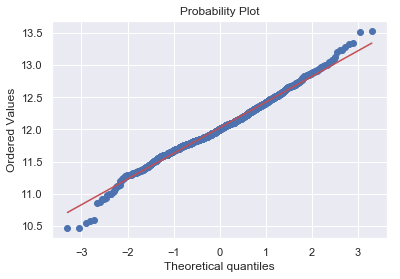

In [121]:
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'],plot=plt)
plt.show()

## 接下来开始进行特征工程

#### 这里我们将我们的训练数据和测试数据进行一个整合

In [122]:
rtrain=train_data.shape[0]
rtest=test_data.shape[0]

y_train=train_data.SalePrice.values

all_data=pd.concat((train_data,test_data)).reset_index(drop=True)
# all_data=all_data.drop(columns='SalePrice')
all_data.drop(['SalePrice'], axis=1, inplace=True)

D:\python\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


#### 查看整合之后的数据

In [123]:
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


### 缺失值处理       
#### 在介绍中我们知道数据中的NA代表的就是无，并不是真的是缺失值
#### 首先先查看每一个特征中的缺失值多少
    sort_values(ascending=False) 降序
    pd.concat(sort=False)保留之前的排序
    all_data.isnull().count() 实际上是将该特征的所有行数数一遍然后相加(总行数)相当于len (即使该特征中没有null值，也会都数一遍)

In [124]:
a=all_data['BsmtCond'].isnull().count()
c=all_data['Fireplaces'].isnull().count()
b=len(all_data['BsmtCond'])
d=len(all_data['Fireplaces'])
print(a,b,c,d)

2917 2917 2917 2917


In [125]:
total=all_data.isnull().sum().sort_values(ascending=False)
percent=(total/all_data.isnull().count()*100).sort_values(ascending=False)
miss_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'],sort=False)
miss_data.head(10)

,Total,Percent
PoolQC,2908,99.691
MiscFeature,2812,96.400
Alley,2719,93.212
Fence,2346,80.425
FireplaceQu,1420,48.680
LotFrontage,486,16.661
GarageFinish,159,5.451
GarageQual,159,5.451
GarageYrBlt,159,5.451
GarageCond,159,5.451


#### 可视化 缺失值数量

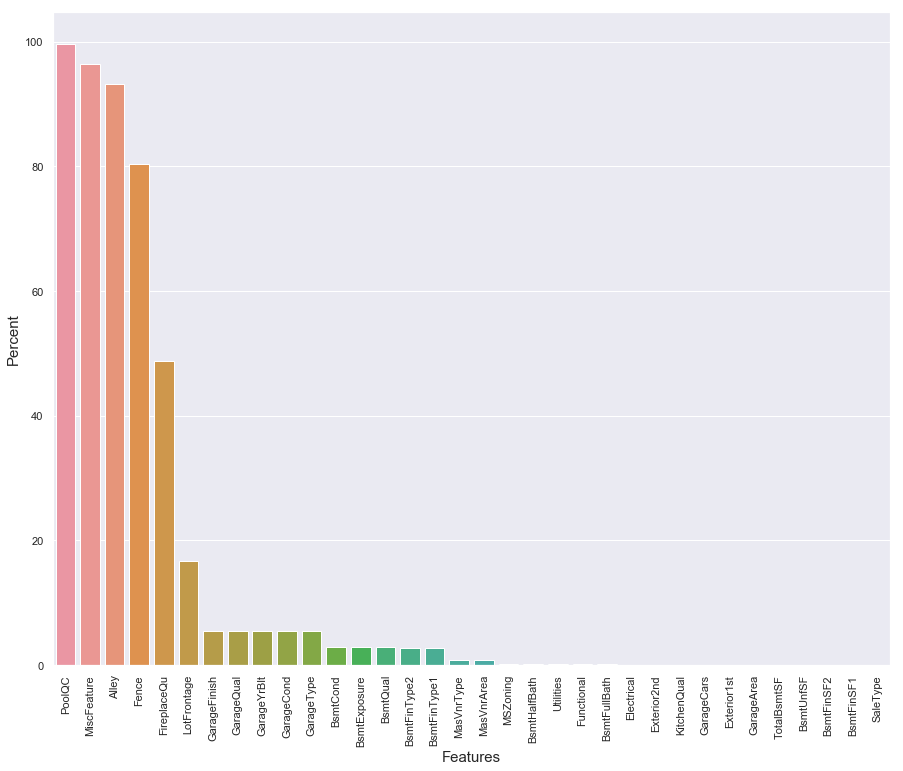

In [126]:
fig,ax=plt.subplots(figsize=(15,12))
# 将x轴上的标签旋转90度
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of miss Features', fontsize=15)
sns.barplot(x=miss_data[miss_data['Percent']>0]['Percent'].index,y=miss_data[miss_data['Percent']>0]['Percent'])
plt.show()

### 填充缺失值
    
#### 方法：
    因为我们这里的有的缺失值(NA)并不是真正的缺失值，而是表示的是没有。所以我们这里将并不是真正的缺失值的值进行一个转换，这里我们根据特征的数据类型来进行填充，如果是数值型我们用0填充，如果是字符型我们用None来进行填充,总之我们根据合适的内容进行填充
    
    如果是真正的缺失值，我们可以采用的方法有 删除(当缺失值众多，或者某个特征非常非常一大部分都是相同的特征值)、或者找合适的值填充(比如相近的样本的特征，比如该特征中出现最频繁的特征值)

#### 最重要的还是了解数据的真正含义吗，这样才有利我们找合适的值进行填充

__PoolQC：__ 数据描述表示NA表示“无游泳池”。这种缺失值是正常的，因为大多数房屋没有游泳池

In [127]:
all_data['PoolQC']=all_data['PoolQC'].fillna('None')

__MiscFeature__ 为NA的表示 未有其他类别未涵盖的其他功能

In [227]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


In [ ]:
# miss_data[miss_data['Percent']>0]['Percent'].index

In [ ]:
# all_data[miss_data[miss_data['Percent']>0]['Percent'].index].head()

In [128]:
all_data['MiscFeature']=all_data['MiscFeature'].fillna('None')

__Alley__ 为NA的表示 没有胡同

In [129]:
all_data['Alley']=all_data['Alley'].fillna('None')

__Fence__ 为NA的表示 没有栅栏

In [130]:
all_data['Fence']=all_data['Fence'].fillna('None')

__FireplaceQu__ 为NA的表示 没有壁炉

In [131]:
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna('None')

__LotFrontage__ 由于连接到房产的每条街道的区域很可能与其附近的其他房屋有相似的区域，我们可以通过邻域的中位数LotFrontage填写缺失值。
    

通过groupby，我们可以切出每一个 Neighborhood 所对应的 LotFrontage，通过这一行代码，我们在各个切片中找出各个 Neighborhood 所对应的中位数，然后返回Combine

In [132]:
all_data.groupby(['Neighborhood'])['LotFrontage'].median().head()

Neighborhood
Blmngtn   43.000
Blueste   24.000
BrDale    21.000
BrkSide   51.000
ClearCr   80.500
Name: LotFrontage, dtype: float64

__使用.transform，__ 我们可以生成与我们样本条数对应的数据，不然我们取中位数只能得到上面这行代码所对应的条数，在.transform中我们可以进行函数运算,这里我们将取出各个切片中的中位数作为，我们对应neighorhood对应的LotFrontage NA值的填充项

In [133]:
all_data['LotFrontage']=all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

在数据集描述中 __'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'__ 为NA时表示没有

In [134]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

__GarageYrBlt, GarageArea and GarageCars__ 为NA时表示 没有

In [135]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

__BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath,BsmtHalfBath :__ 缺失值表示没有，但是根据记录我们似乎把他们置为0更好

In [136]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

__BsmtFinType2,BsmtExposure,BsmtQual,BsmtFinType1,BsmtCond__   都是对地下室如何进行描述的特征，NaN意味着没有地下室。

In [137]:
for column in ('BsmtFinType2','BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond'):
    all_data[column] = all_data[column].fillna('None')

__MasVnrArea__ 为NA的表示 没有 MasVnrArea

In [138]:
all_data['MasVnrArea']=all_data['MasVnrArea'].fillna(0)

__MasVnrType__ 为NA的表示 没有 MasVnrType

In [139]:
all_data['MasVnrType']=all_data['MasVnrType'].fillna('None')

在 __MSZoning__ 中 RL是最常见的值，我们用RL 来进行填充

In [140]:
all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

__Electrical__ 为NA的表示 因为只有一个缺失值，我们将使用该特征中出现次数最频繁的值作为填充值

In [141]:
all_data['Electrical']=all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

__Utilities__ 特征中我们发现几乎所有的特征值都是 AllPub，除了两个NA和一个其他值，所以我们判断这个特征可以被安全删除

In [142]:
all_data.drop(columns='Utilities',inplace=True)

__Functional__ 我们将使用出现次数最频繁的值去替换它

In [143]:
all_data['Functional'].mode()[0]

'Typ'

In [144]:
all_data['Functional']=all_data['Functional'].fillna(all_data['Functional'].mode()[0])

__SaleType__ 我们将使用出现次数最频繁的值去替换它

In [145]:
all_data['SaleType']=all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

__Exterior2nd 和 Exterior1st__ 分别只有一个缺失值，这里我们将使用出现次数最频繁的值去替换它

In [146]:
for col in ['Exterior2nd','Exterior1st']:
    all_data[col]=all_data[col].fillna(all_data[col].mode()[0])

__KitchenQual__ 也只有一个缺失值，这里我们使用出现次数最频繁的值去替换它

In [147]:
all_data['KitchenQual']=all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

### 再次检验缺失值

In [148]:
all_data_na_persent=(all_data.isnull().sum()/all_data.isnull().count())*100
all_data_na_persent=all_data_na_persent.drop(all_data_na_persent[all_data_na_persent==0].index).sort_values(ascending=False)
miss_data=pd.DataFrame({'Miss Percent':all_data_na_persent})
miss_data

,Miss Percent


In [149]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.000,0.000,GLQ,Unf,1.000,0.000,Gd,150.000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,548.000,2.000,TA,RFn,TA,Attchd,2003.000,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.000,Reg,0,60,RL,196.000,BrkFace,None,0,2,CollgCr,61,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,8,856.000,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.000,0.000,ALQ,Unf,0.000,1.000,Gd,284.000,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,460.000,2.000,TA,RFn,TA,Attchd,1976.000,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.000,Reg,0,20,RL,0.000,None,None,0,5,Veenker,0,8,6,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,1262.000,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.000,0.000,GLQ,Unf,1.000,0.000,Gd,434.000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,608.000,2.000,TA,RFn,TA,Attchd,2001.000,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.000,IR1,0,60,RL,162.000,BrkFace,None,0,9,CollgCr,42,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,920.000,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.000,0.000,ALQ,Unf,1.000,0.000,TA,540.000,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,642.000,3.000,TA,Unf,TA,Detchd,1998.000,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.000,IR1,0,70,RL,0.000,None,None,0,2,Crawfor,35,5,7,Y,0,None,CompShg,Gable,Abnorml,WD,0,Pave,7,756.000,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.000,0.000,GLQ,Unf,1.000,0.000,Gd,490.000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,836.000,3.000,TA,RFn,TA,Attchd,2000.000,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.000,IR1,0,60,RL,350.000,BrkFace,None,0,12,NoRidge,84,5,8,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,9,1145.000,192,2000,2000,2008


### 进行LabelEncoder打标签,然后进行Onehot编码
    我们认为LabelEncoder有助于检索和保留序数特征所隐含的信息，其实有的数据型特征实际上是类别型的特征。比如MSSubClass，是评价房子种类的一个特征，给出的是10-100的数字，但实际上是类别，所以将其转化为字符串类别。

In [150]:
"""转换一些真正绝对的数值变量"""
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


all_data['OverallCond'] = all_data['OverallCond'].astype(str)
# all_data['OverallQual'] = all_data['OverallQual'].astype(str)


all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

#### 接下来我们将一些分类变量和之前转换的变量进行打标签

In [151]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


#### 由于区域相关特征对于确定房价非常重要，我们还增加了一个特征，即每个房屋的地下室总面积，一楼和二楼面积

In [97]:
pd.set_option('display.max_columns',None, 'display.max_rows', 100)

In [98]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.000,0.000,GLQ,Unf,1.000,0.000,Gd,150.000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,548.000,2.000,TA,RFn,TA,Attchd,2003.000,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.000,Reg,0,60,RL,196.000,BrkFace,None,0,2,CollgCr,61,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,8,856.000,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.000,0.000,ALQ,Unf,0.000,1.000,Gd,284.000,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,460.000,2.000,TA,RFn,TA,Attchd,1976.000,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.000,Reg,0,20,RL,0.000,None,None,0,5,Veenker,0,8,6,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,1262.000,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.000,0.000,GLQ,Unf,1.000,0.000,Gd,434.000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,608.000,2.000,TA,RFn,TA,Attchd,2001.000,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.000,IR1,0,60,RL,162.000,BrkFace,None,0,9,CollgCr,42,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,920.000,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.000,0.000,ALQ,Unf,1.000,0.000,TA,540.000,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,642.000,3.000,TA,Unf,TA,Detchd,1998.000,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.000,IR1,0,70,RL,0.000,None,None,0,2,Crawfor,35,5,7,Y,0,None,CompShg,Gable,Abnorml,WD,0,Pave,7,756.000,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.000,0.000,GLQ,Unf,1.000,0.000,Gd,490.000,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,836.000,3.000,TA,RFn,TA,Attchd,2000.000,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.000,IR1,0,60,RL,350.000,BrkFace,None,0,12,NoRidge,84,5,8,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,9,1145.000,192,2000,2000,2008


In [152]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

查看偏度较大的特征

In [153]:
number_feats=all_data.dtypes[all_data.dtypes != 'object'].index

skewed_feats=all_data[number_feats].apply(lambda x :skew(x.dropna())).sort_values(ascending=False)
print('\nSkew in numerical features: \n')

skewness=pd.DataFrame({'Skew':skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


#### 对于高偏度值的特征进行调整:

Box-Cox 变换是常见的一种数据变换，用于连续的响应变量不满足正态分布的情况。Box-Cox变换之后，可以一定程度上减小不可观测的误差和预测变量的相关性。
比如在使用线性回归的时候，由于残差 epsilon 不符合正态分布而不满足建模的条件，这时候要对响应变量Y进行变换，把数据变成正态的。

这是一种根据数据自动寻找「最佳」变换函数的方法

In [156]:
skewness=skewness[abs(skewness) > 0.75]

print("一共有 {} 个数字类型需要使用 Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features=skewness.index
lam=0.15
for feat in skewed_features:
    all_data[feat]=boxcox1p(all_data[feat],lam)

There are 59 skewed numerical features to Box Cox transform


#### onehot 编码
    注意：之前在缺失值补充的时候，不小心将0补充成‘0’，结果输出的shape为(2917, 663)

In [157]:
all_data=pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


划分训练集和测试集

In [158]:
train=all_data[:rtrain]
test=all_data[rtrain:]

In [159]:
train.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,3.093,3.092,0.000,0.572,1.001,1.122,1.001,3.032,0.000,0.834,1.293,0.572,0.000,0.834,2.521,0.572,0.000,1.122,0.834,1.122,1.001,0.000,0.834,1.293,2.951,0.834,1.216,0.834,1.216,3.359,3.310,0.572,0.000,0.572,0.834,0.000,3.799,2.227,1.001,0.000,1.505,2.612,0.000,1.122,2.204,1.122,1.357,0.834,0.000,1.001,0.000,0.572,1.413,3.093,0.000,3.359,3.359,0.834,3.436,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,

In [172]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [185]:
# train[train.isnull()==True]

## 开始定义模型，然后进行训练

In [161]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [162]:
train.values

array([[3.09314519, 3.09240303, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [3.21554457, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [3.11599385, 3.09682936, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [3.19658677, 3.18691965, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [3.16603158, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [3.21405063, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [163]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

LaSSO Regression(脊回归）

    这个模型对异常点非常的敏感，因此，我们使用sklearn库的Robuscaler()函数

In [164]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

Elastic Net Regression模型:

In [165]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [175]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    

There are 57 skewed numerical features to Box Cox transform


Kernel Ridge Regression模型

In [166]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

Gradient Boosting Regression模型

In [167]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

XGBoost模型

In [168]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

LightGBM模型

In [169]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### 单一模型分数测试

In [170]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1141 (0.0083)



In [171]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1141 (0.0083)



In [172]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1334 (0.0071)



In [173]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1177 (0.0080)



In [174]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1166 (0.0072)



In [175]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1162 (0.0071)



#### 通过继承sklearn的基类，帮助我们建立一个平均基本模型
#### 这样我们可以自己编写函数对数据进行预处理。
    clone 功能：复制模型及其参数。属于深层复制。

In [176]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
#             print('开始 fit')
            model.fit(X, y)
            
        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [177]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))
score=rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1123 (0.0081)



我们可以看出来简单的模型叠加可以帮助我们较小误差

#### 升级平均基本模型

In [178]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

为了使这两种方法具有可比性（通过使用相同数量的模型），我们只是平均Enet KRR和Gboost，然后我们添加lasso作为元模型

In [179]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1090 (0.0077)


#### Ensembling StackedRegressor, XGBoost and LightGBM
define a rmsle evaluation function

In [180]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

StackedRegressor:

In [181]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07649930726877356


XGBoost:

In [182]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07950066318189246


In [189]:
type(xgb_train_pred)

numpy.ndarray

LightGBM:

In [183]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07307464036005418


#### 这里我们根据交叉验证的error数值，来调整我们的权重

In [184]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07424688553894829


Ensemble prediction:

In [190]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

Submission

In [192]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

In [194]:
pd.read_csv('submission.csv').head(5)

,Id,SalePrice
0,1461,119407.749
1,1462,157948.861
2,1463,188610.043
3,1464,197155.794
4,1465,191945.994
